In [64]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
from math import *

In [86]:
def f(r, x):
    return r * x * (1 - x)

In [101]:
def simple_iteration_solve(f, x0, maxiter = 100500):
    result = []
    for i in range(maxiter):
        x0 = f(x0)
        result.append(x0)
    return np.array(result)

x0 = 0.300000


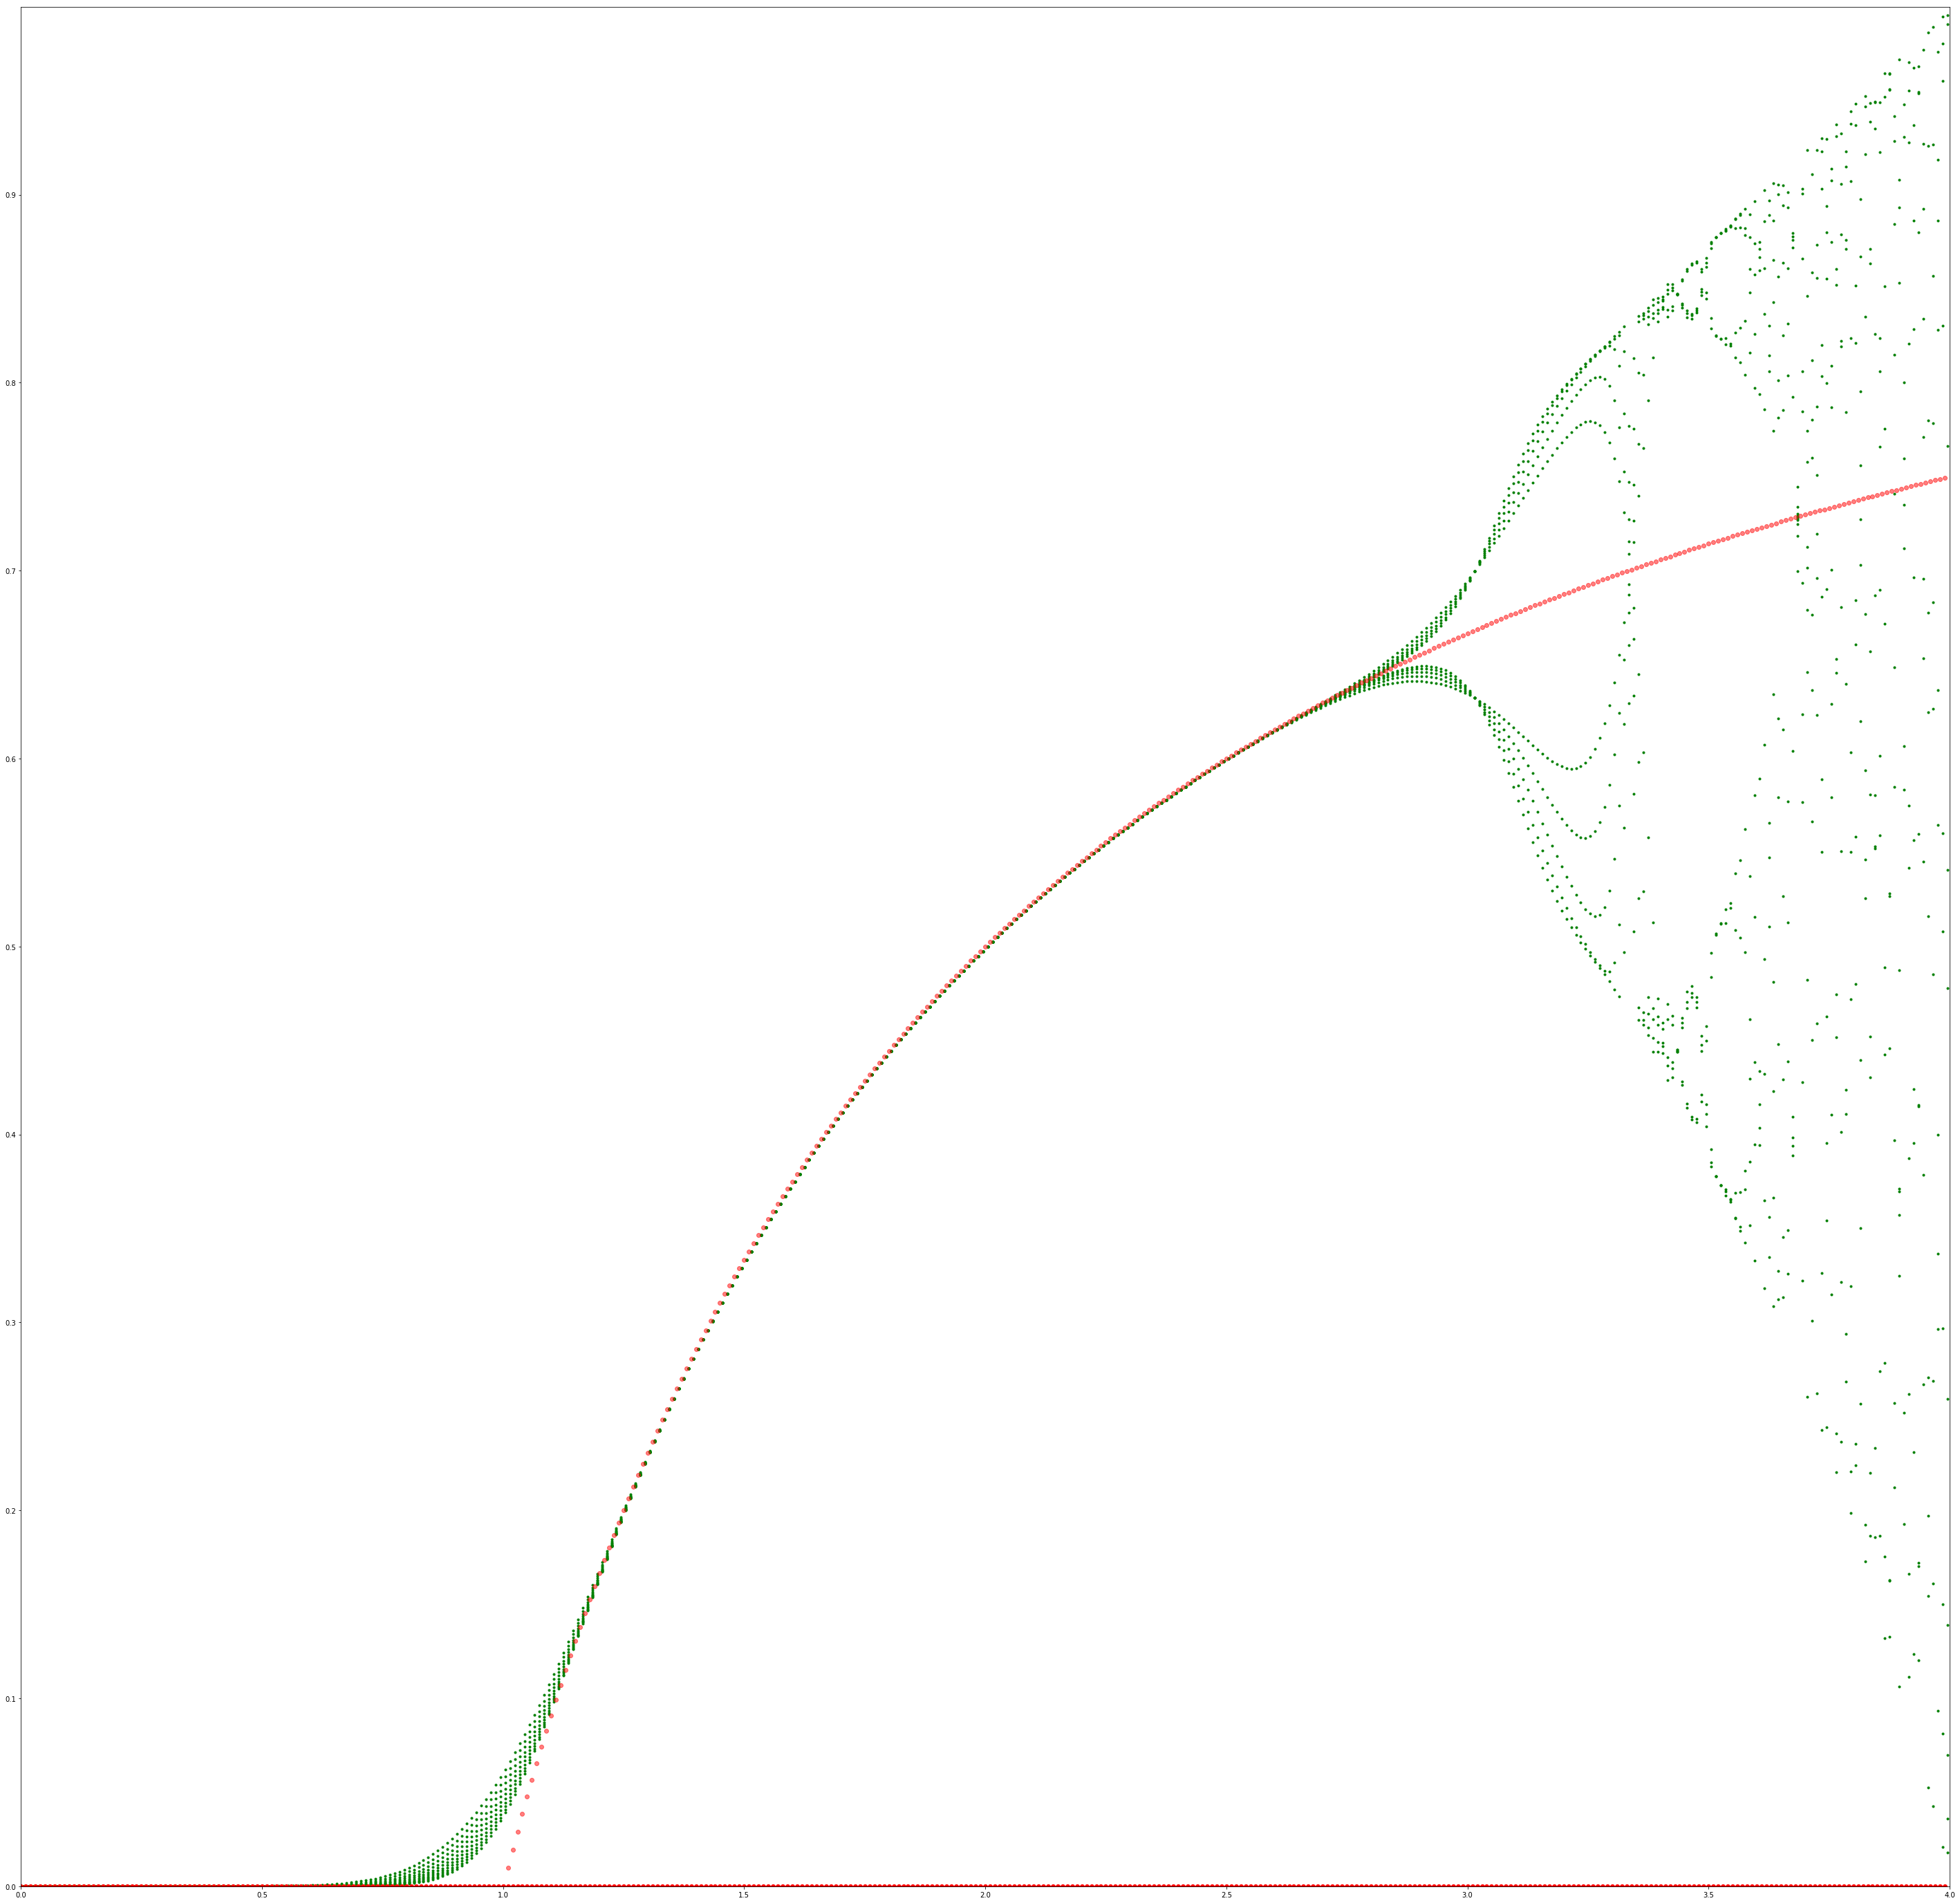

In [115]:
def plot_bifurcation(x0 = 0.5, figsize=(50, 50), left = 0, right = 4, step = 0.01):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlim([0, 4])
    ax.set_ylim([0, 1])
    ax.set_yticks(np.arange(0, 1, 0.1))
    x0 = x0
    print("x0 = %f" % x0)
    maxiter = 20
    for r in np.arange(left, right, step):
        points = simple_iteration_solve(lambda x: f(r, x), x0, maxiter)[-maxiter//2:]
#         print("r=%f, roots=(0, %f), val=%f" % (r, 1 - 1 / r, points[-1]))
        ax.plot(r, 0, color='red', marker = 'o')
        if (r >= 0.5):
            ax.plot(r, (1-1/r), color='red', alpha=0.5, marker = 'o')
        ax.scatter(np.full(points.size, r + step * 0.5), points, color = 'green', marker = '.')
#         fig.savefig("bifurcation.png")
plot_bifurcation(x0 = 0.3, figsize=(50, 50))